In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [127]:
df = pd.read_csv('ecg2.csv', header = None)

In [128]:
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0.0
4994,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0.0
4995,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0.0
4996,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0.0


In [129]:
x = df.drop(df[140], axis = 1)
y = df[140]

In [130]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [131]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [132]:
# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10)

In [133]:
encoder = Sequential([Dense(64, activation = 'relu',input_shape = (x_train.shape[1],))])
decoder = Sequential([Dense(x_train.shape[1], activation = 'sigmoid')])

In [134]:
autodecoder = Sequential([encoder, decoder])

In [135]:
autodecoder.compile(optimizer='Adam', loss = 'mse', metrics=['accuracy'])

In [136]:
autodecoder.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_23 (Sequential)  (None, 64)                8960      
                                                                 
 sequential_24 (Sequential)  (None, 139)               9035      
                                                                 
Total params: 17995 (70.29 KB)
Trainable params: 17995 (70.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [137]:
r = autodecoder.fit(x_train, x_train, epochs = 100, batch_size = 32, validation_data = (x_test, x_test))

Epoch 1/100
125/125 [==============================] - 1s 2ms/step - loss: 0.8491 - accuracy: 0.0338 - val_loss: 0.6961 - val_accuracy: 0.0680
Epoch 2/100
125/125 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.0718 - val_loss: 0.6611 - val_accuracy: 0.1010
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.1018 - val_loss: 0.6491 - val_accuracy: 0.1160
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 0.6569 - accuracy: 0.1143 - val_loss: 0.6422 - val_accuracy: 0.1170
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.1303 - val_loss: 0.6379 - val_accuracy: 0.1330
Epoch 6/100
125/125 [==============================] - 0s 1ms/step - loss: 0.6472 - accuracy: 0.1393 - val_loss: 0.6344 - val_accuracy: 0.1450
Epoch 7/100
125/125 [==============================] - 0s 1ms/step - loss: 0.6441 - accuracy: 0.1531 - val_loss: 0.6321 - val_accuracy: 0.1450

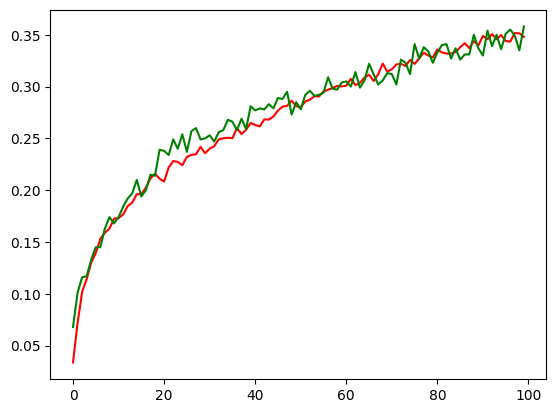

In [138]:
plt.plot(r.history['accuracy'], c='r')
plt.plot(r.history['val_accuracy'], c= 'g')

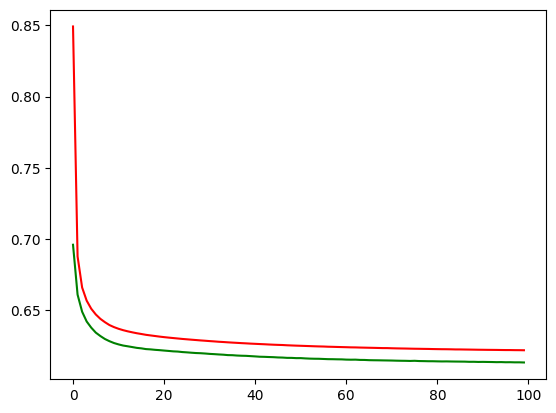

In [139]:
plt.plot(r.history['loss'], c='r')
plt.plot(r.history['val_loss'], c= 'g')

In [140]:
decoded_data = autodecoder.predict(x_test)
mse = np.mean(np.power(x_test - decoded_data, 2), axis = 1)
threshold = np.percentile(mse, 0.95)

outlier = mse > threshold

32/32 [==============================] - 0s 745us/step


In [141]:
print(confusion_matrix(y_test, outlier))
print(classification_report(y_test, outlier))

[[  1 408]
 [  9 582]]
              precision    recall  f1-score   support

         0.0       0.10      0.00      0.00       409
         1.0       0.59      0.98      0.74       591

    accuracy                           0.58      1000
   macro avg       0.34      0.49      0.37      1000
weighted avg       0.39      0.58      0.44      1000



In [142]:
print ('outliers:', np.sum(outlier))
print ('anomalies', np.sum(y_test[outlier] == 1))

outliers: 990
anomalies 582
